In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

import glob
import os

pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Helper Functions

In [3]:
def write_report(data,report_dir,report_name="report",pdb_maps=None):
    """
    Write report related entries like csv, pdbs, and pdf to the given directory
    pdb_maps are directory names plus the filepath column
    """
    os.makedirs(report_dir,exist_ok=True)
    report_tsv_path = os.path.join(report_dir,f"{report_name}.tsv")
    data.to_csv(report_tsv_path,sep="\t",index=False)
    if pdb_maps is not None:
        for dirname in pdb_maps:
            dest_dir = os.path.join(report_dir,dirname)
            os.makedirs(dest_dir,exist_ok=True)
            for idx,row in data.iterrows():
                pdb_path = row[pdb_maps[dirname]]
                if not os.path.exists(pdb_path):
                    print(f"Warning: {pdb_path} is not found")
                shutil.copy(pdb_path,dest_dir)
    print("Done writing report")

## BindCraft Filtering

In [6]:
def get_bindcraft_pdb_path(design_id,directory):
    # Find the pdb file that starts with the Design ID
    matching_file = glob.glob(f"{directory}/{design_id}*.pdb")[0]
    return matching_file

def get_bindcraft_summary(summary_dir):
    final_stats_df_rows = []
    for path in glob.glob(f"{summary_dir}/*final_design_stats.csv"):
        cur_df = pd.read_csv(path)
        df_path = os.path.dirname(path)
        pdb_paths = []
        for idx,row in cur_df.iterrows():
            pdb_path = get_bindcraft_pdb_path(row["Design"],f"{df_path}/Accepted/")
            pdb_paths.append(pdb_path)
        cur_df["pdb_path"] = pdb_paths
        final_stats_df_rows.append(cur_df)
    final_stats_df = pd.concat(final_stats_df_rows)
    return final_stats_df

bindcraft_summary_dir_seg1 = "./data/Seg1_FreeDiffusion"
bindcraft_summary_dir_seg2 = "./data/Seg2_FreeDiffusion"

egfr_seg1_df = get_bindcraft_summary(bindcraft_summary_dir_seg1)
egfr_seg2_df = get_bindcraft_summary(bindcraft_summary_dir_seg2)

egfr_seg1_df["egfr_segment"] = "seg1"
egfr_seg2_df["egfr_segment"] = "seg2"

egfr_df_combined = pd.concat([egfr_seg1_df,egfr_seg2_df])
egfr_df_combined

rank_by = "Average_i_pTM"
egfr_df_combined_ranked = egfr_df_combined.sort_values(by=rank_by,ascending=False).reset_index(drop=True)
egfr_df_combined_ranked


,Rank,Design,Protocol,Length,Seed,Helicity,Target_Hotspot,Sequence,InterfaceResidues,MPNN_score,MPNN_seq_recovery,Average_pLDDT,1_pLDDT,2_pLDDT,3_pLDDT,4_pLDDT,5_pLDDT,Average_pTM,1_pTM,2_pTM,3_pTM,4_pTM,5_pTM,Average_i_pTM,1_i_pTM,2_i_pTM,3_i_pTM,4_i_pTM,5_i_pTM,Average_pAE,1_pAE,2_pAE,3_pAE,4_pAE,5_pAE,Average_i_pAE,1_i_pAE,2_i_pAE,3_i_pAE,4_i_pAE,5_i_pAE,Average_i_pLDDT,1_i_pLDDT,2_i_pLDDT,3_i_pLDDT,4_i_pLDDT,5_i_pLDDT,Average_ss_pLDDT,1_ss_pLDDT,2_ss_pLDDT,3_ss_pLDDT,4_ss_pLDDT,5_ss_pLDDT,Average_Unrelaxed_Clashes,1_Unrelaxed_Clashes,2_Unrelaxed_Clashes,3_Unrelaxed_Clashes,4_Unrelaxed_Clashes,5_Unrelaxed_Clashes,Average_Relaxed_Clashes,1_Relaxed_Clashes,2_Relaxed_Clashes,3_Relaxed_Clashes,4_Relaxed_Clashes,5_Relaxed_Clashes,Average_Binder_Energy_Score,1_Binder_Energy_Score,2_Binder_Energy_Score,3_Binder_Energy_Score,4_Binder_Energy_Score,5_Binder_Energy_Score,Average_Surface_Hydrophobicity,1_Surface_Hydrophobicity,2_Surface_Hydrophobicity,3_Surface_Hydrophobicity,4_Surface_Hydrophobicity,5_Surface_Hydrophobicity,Average_ShapeComplementarity,1_ShapeComplementarity,2_ShapeComplementarity,3_ShapeComplementarity,4_ShapeComplementarity,5_ShapeComplementarity,Average_PackStat,1_PackStat,2_PackStat,3_PackStat,4_PackStat,5_PackStat,Average_dG,1_dG,2_dG,3_dG,4_dG,5_dG,Average_dSASA,1_dSASA,2_dSASA,3_dSASA,4_dSASA,5_dSASA,Average_dG/dSASA,1_dG/dSASA,2_dG/dSASA,3_dG/dSASA,4_dG/dSASA,5_dG/dSASA,Average_Interface_SASA_%,1_Interface_SASA_%,2_Interface_SASA_%,3_Interface_SASA_%,4_Interface_SASA_%,5_Interface_SASA_%,Average_Interface_Hydrophobicity,1_Interface_Hydrophobicity,2_Interface_Hydrophobicity,3_Interface_Hydrophobicity,4_Interface_Hydrophobicity,5_Interface_Hydrophobicity,Average_n_InterfaceResidues,1_n_InterfaceResidues,2_n_InterfaceResidues,3_n_InterfaceResidues,4_n_InterfaceResidues,5_n_InterfaceResidues,Average_n_InterfaceHbonds,1_n_InterfaceHbonds,2_n_InterfaceHbonds,3_n_InterfaceHbonds,4_n_InterfaceHbonds,5_n_InterfaceHbonds,Average_InterfaceHbondsPercentage,1_InterfaceHbondsPercentage,2_InterfaceHbondsPercentage,3_InterfaceHbondsPercentage,4_InterfaceHbondsPercentage,5_InterfaceHbondsPercentage,Average_n_InterfaceUnsatHbonds,1_n_InterfaceUnsatHbonds,2_n_InterfaceUnsatHbonds,3_n_InterfaceUnsatHbonds,4_n_InterfaceUnsatHbonds,5_n_InterfaceUnsatHbonds,Average_InterfaceUnsatHbondsPercentage,1_InterfaceUnsatHbondsPercentage,2_InterfaceUnsatHbondsPercentage,3_InterfaceUnsatHbondsPercentage,4_InterfaceUnsatHbondsPercentage,5_InterfaceUnsatHbondsPercentage,Average_Interface_Helix%,1_Interface_Helix%,2_Interface_Helix%,3_Interface_Helix%,4_Interface_Helix%,5_Interface_Helix%,Average_Interface_BetaSheet%,1_Interface_BetaSheet%,2_Interface_BetaSheet%,3_Interface_BetaSheet%,4_Interface_BetaSheet%,5_Interface_BetaSheet%,Average_Interface_Loop%,1_Interface_Loop%,2_Interface_Loop%,3_Interface_Loop%,4_Interface_Loop%,5_Interface_Loop%,Average_Binder_Helix%,1_Binder_Helix%,2_Binder_Helix%,3_Binder_Helix%,4_Binder_Helix%,5_Binder_Helix%,Average_Binder_BetaSheet%,1_Binder_BetaSheet%,2_Binder_BetaSheet%,3_Binder_BetaSheet%,4_Binder_BetaSheet%,5_Binder_BetaSheet%,Average_Binder_Loop%,1_Binder_Loop%,2_Binder_Loop%,3_Binder_Loop%,4_Binder_Loop%,5_Binder_Loop%,Average_InterfaceAAs,1_InterfaceAAs,2_InterfaceAAs,3_InterfaceAAs,4_InterfaceAAs,5_InterfaceAAs,Average_Hotspot_RMSD,1_Hotspot_RMSD,2_Hotspot_RMSD,3_Hotspot_RMSD,4_Hotspot_RMSD,5_Hotspot_RMSD,Average_Target_RMSD,1_Target_RMSD,2_Target_RMSD,3_Target_RMSD,4_Target_RMSD,5_Target_RMSD,Average_Binder_pLDDT,1_Binder_pLDDT,2_Binder_pLDDT,3_Binder_pLDDT,4_Binder_pLDDT,5_Binder_pLDDT,Average_Binder_pTM,1_Binder_pTM,2_Binder_pTM,3_Binder_pTM,4_Binder_pTM,5_Binder_pTM,Average_Binder_pAE,1_Binder_pAE,2_Binder_pAE,3_Binder_pAE,4_Binder_pAE,5_Binder_pAE,Average_Binder_RMSD,1_Binder_RMSD,2_Binder_RMSD,3_Binder_RMSD,4_Binder_RMSD,5_Binder_RMSD,DesignTime,Notes,TargetSettings,Filters,AdvancedSettings,pdb_path,egfr_segment
0,1,EGFR_Seg1_l53_s513701_mpnn1,4stage,53,513701,-0.3,NaN,ENPYMRTLEELQNHPDPEVRKFVEGVYNG

<Axes: xlabel='Average_Binder_pTM', ylabel='Average_i_pTM'>

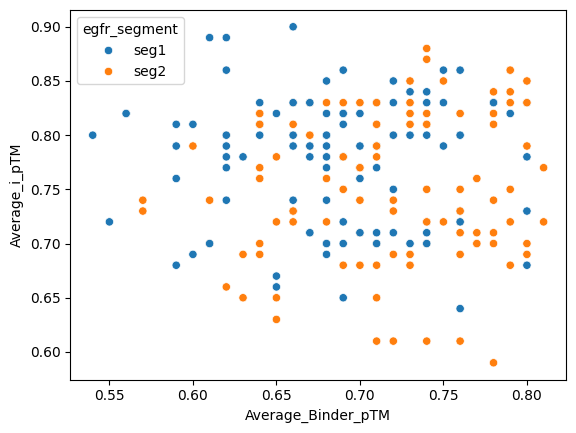

In [7]:
sns.scatterplot(data=egfr_df_combined_ranked,x="Average_Binder_pTM",y="Average_i_pTM",hue="egfr_segment")

In [8]:
egfr_df_combined_ranked_filtered = egfr_df_combined_ranked[
(egfr_df_combined_ranked["Average_i_pTM"] > 0.8)
&(egfr_df_combined_ranked["Average_Binder_pTM"] > 0.75)
]
egfr_df_combined_ranked_filtered["barcode"] = egfr_df_combined_ranked_filtered["Design"]
egfr_df_combined_ranked_filtered["seq"] = egfr_df_combined_ranked_filtered["Sequence"]
egfr_df_combined_ranked_filtered

/var/folders/t9/ndgd9x2d2t3bhrkcvg51q9n00000gq/T/ipykernel_65521/2091608233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egfr_df_combined_ranked_filtered["barcode"] = egfr_df_combined_ranked_filtered["Design"]
/var/folders/t9/ndgd9x2d2t3bhrkcvg51q9n00000gq/T/ipykernel_65521/2091608233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egfr_df_combined_ranked_filtered["seq"] = egfr_df_combined_ranked_filtered["Sequence"]


,Rank,Design,Protocol,Length,Seed,Helicity,Target_Hotspot,Sequence,InterfaceResidues,MPNN_score,MPNN_seq_recovery,Average_pLDDT,1_pLDDT,2_pLDDT,3_pLDDT,4_pLDDT,5_pLDDT,Average_pTM,1_pTM,2_pTM,3_pTM,4_pTM,5_pTM,Average_i_pTM,1_i_pTM,2_i_pTM,3_i_pTM,4_i_pTM,5_i_pTM,Average_pAE,1_pAE,2_pAE,3_pAE,4_pAE,5_pAE,Average_i_pAE,1_i_pAE,2_i_pAE,3_i_pAE,4_i_pAE,5_i_pAE,Average_i_pLDDT,1_i_pLDDT,2_i_pLDDT,3_i_pLDDT,4_i_pLDDT,5_i_pLDDT,Average_ss_pLDDT,1_ss_pLDDT,2_ss_pLDDT,3_ss_pLDDT,4_ss_pLDDT,5_ss_pLDDT,Average_Unrelaxed_Clashes,1_Unrelaxed_Clashes,2_Unrelaxed_Clashes,3_Unrelaxed_Clashes,4_Unrelaxed_Clashes,5_Unrelaxed_Clashes,Average_Relaxed_Clashes,1_Relaxed_Clashes,2_Relaxed_Clashes,3_Relaxed_Clashes,4_Relaxed_Clashes,5_Relaxed_Clashes,Average_Binder_Energy_Score,1_Binder_Energy_Score,2_Binder_Energy_Score,3_Binder_Energy_Score,4_Binder_Energy_Score,5_Binder_Energy_Score,Average_Surface_Hydrophobicity,1_Surface_Hydrophobicity,2_Surface_Hydrophobicity,3_Surface_Hydrophobicity,4_Surface_Hydrophobicity,5_Surface_Hydrophobicity,Average_ShapeComplementarity,1_ShapeComplementarity,2_ShapeComplementarity,3_ShapeComplementarity,4_ShapeComplementarity,5_ShapeComplementarity,Average_PackStat,1_PackStat,2_PackStat,3_PackStat,4_PackStat,5_PackStat,Average_dG,1_dG,2_dG,3_dG,4_dG,5_dG,Average_dSASA,1_dSASA,2_dSASA,3_dSASA,4_dSASA,5_dSASA,Average_dG/dSASA,1_dG/dSASA,2_dG/dSASA,3_dG/dSASA,4_dG/dSASA,5_dG/dSASA,Average_Interface_SASA_%,1_Interface_SASA_%,2_Interface_SASA_%,3_Interface_SASA_%,4_Interface_SASA_%,5_Interface_SASA_%,Average_Interface_Hydrophobicity,1_Interface_Hydrophobicity,2_Interface_Hydrophobicity,3_Interface_Hydrophobicity,4_Interface_Hydrophobicity,5_Interface_Hydrophobicity,Average_n_InterfaceResidues,1_n_InterfaceResidues,2_n_InterfaceResidues,3_n_InterfaceResidues,4_n_InterfaceResidues,5_n_InterfaceResidues,Average_n_InterfaceHbonds,1_n_InterfaceHbonds,2_n_InterfaceHbonds,3_n_InterfaceHbonds,4_n_InterfaceHbonds,5_n_InterfaceHbonds,Average_InterfaceHbondsPercentage,1_InterfaceHbondsPercentage,2_InterfaceHbondsPercentage,3_InterfaceHbondsPercentage,4_InterfaceHbondsPercentage,5_InterfaceHbondsPercentage,Average_n_InterfaceUnsatHbonds,1_n_InterfaceUnsatHbonds,2_n_InterfaceUnsatHbonds,3_n_InterfaceUnsatHbonds,4_n_InterfaceUnsatHbonds,5_n_InterfaceUnsatHbonds,Average_InterfaceUnsatHbondsPercentage,1_InterfaceUnsatHbondsPercentage,2_InterfaceUnsatHbondsPercentage,3_InterfaceUnsatHbondsPercentage,4_InterfaceUnsatHbondsPercentage,5_InterfaceUnsatHbondsPercentage,Average_Interface_Helix%,1_Interface_Helix%,2_Interface_Helix%,3_Interface_Helix%,4_Interface_Helix%,5_Interface_Helix%,Average_Interface_BetaSheet%,1_Interface_BetaSheet%,2_Interface_BetaSheet%,3_Interface_BetaSheet%,4_Interface_BetaSheet%,5_Interface_BetaSheet%,Average_Interface_Loop%,1_Interface_Loop%,2_Interface_Loop%,3_Interface_Loop%,4_Interface_Loop%,5_Interface_Loop%,Average_Binder_Helix%,1_Binder_Helix%,2_Binder_Helix%,3_Binder_Helix%,4_Binder_Helix%,5_Binder_Helix%,Average_Binder_BetaSheet%,1_Binder_BetaSheet%,2_Binder_BetaSheet%,3_Binder_BetaSheet%,4_Binder_BetaSheet%,5_Binder_BetaSheet%,Average_Binder_Loop%,1_Binder_Loop%,2_Binder_Loop%,3_Binder_Loop%,4_Binder_Loop%,5_Binder_Loop%,Average_InterfaceAAs,1_InterfaceAAs,2_InterfaceAAs,3_InterfaceAAs,4_InterfaceAAs,5_InterfaceAAs,Average_Hotspot_RMSD,1_Hotspot_RMSD,2_Hotspot_RMSD,3_Hotspot_RMSD,4_Hotspot_RMSD,5_Hotspot_RMSD,Average_Target_RMSD,1_Target_RMSD,2_Target_RMSD,3_Target_RMSD,4_Target_RMSD,5_Target_RMSD,Average_Binder_pLDDT,1_Binder_pLDDT,2_Binder_pLDDT,3_Binder_pLDDT,4_Binder_pLDDT,5_Binder_pLDDT,Average_Binder_pTM,1_Binder_pTM,2_Binder_pTM,3_Binder_pTM,4_Binder_pTM,5_Binder_pTM,Average_Binder_pAE,1_Binder_pAE,2_Binder_pAE,3_Binder_pAE,4_Binder_pAE,5_Binder_pAE,Average_Binder_RMSD,1_Binder_RMSD,2_Binder_RMSD,3_Binder_RMSD,4_Binder_RMSD,5_Binder_RMSD,DesignTime,Notes,TargetSettings,Filters,AdvancedSettings,pdb_path,egfr_segment,barcode,seq
7,6,EGFR_Seg1_l59_s780908_mpnn1,4stage,59,780908,-0.3,NaN,SEEELKELWEKVQELYY

In [9]:
write_report(
    egfr_df_combined_ranked_filtered,
    report_dir="./filtered_pdbs",
    report_name="EGFRBindCraftSummary",
    pdb_maps={
        "af2_pdbs":"pdb_path"
    }
)

Done writing report
